## 1 nonlocal关键字
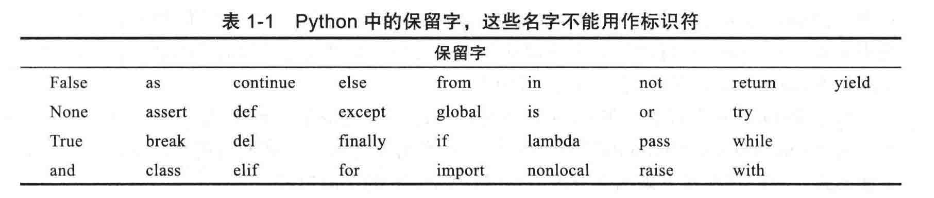

In [40]:
# from rich import print

In [41]:
def a():
    x=10
    y=2
    def inner_a():
        #修改了上层局部变量x
        nonlocal x
        x+=20
        #y+=2
        # #报错
        print(f"inner_x={x}")
        print(f"inner_y={y}")#引用了值但不能修改
    inner_a()
    print(f"x={x}")
    
a()
print("-"*20)



inner_x=30

inner_y=2

x=30

--------------------

## 2 yield 生成器函数
`yield` 是用于创建生成器（generator）的关键字，它与上述的 `iter`、`next` 迭代和 `for` 迭代有一些重要区别。让我们看一下这些区别：

1. **生成器（`yield`）：**
   
   - **懒加载：** 使用 `yield` 创建的生成器是懒加载的。它们只在需要时生成值，并在生成值后保存状态，以便下一次调用 `next()` 时可以从上次停止的地方继续执行。

   - **保存状态：** 生成器可以在函数的执行过程中保存局部变量的状态，而在每次调用 `next()` 时，函数从上次 `yield` 的地方继续执行。

   - **迭代协议：** 生成器自动实现了迭代协议，不需要显式地实现 `__iter__()` 和 `__next__()` 方法。

   ```python
   def my_generator():
       for i in range(3):
           yield i

   gen = my_generator()
   ```

   在这个例子中，`my_generator` 是一个生成器函数，而 `gen` 是生成器对象。调用 `next(gen)` 会逐个获取生成器的值。

2. **`yield` 与 `return` 的区别：**

   - `yield` 用于生成值并保存状态，允许函数在下一次调用时继续执行。
   - `return` 用于结束函数的执行并返回一个值，但不保存函数的状态。

   ```python
   def my_function():
       for i in range(3):
           yield i

   my_gen = my_function()

   for value in my_gen:
       print(value)
   ```

   这里 `my_function` 使用 `yield` 返回一个生成器，而 `for` 循环则逐个获取生成器的值。

总的来说，`yield` 与 `iter`、`next` 迭代以及 `for` 迭代的主要区别在于它创建了一个懒加载的生成器对象，允许在迭代过程中保持函数的状态。
这使得生成器适用于处理大量数据或需要延迟计算的情况。

In [42]:
def generation_():
    for i in range(5):
        yield i
    return "finished"


a = generation_()

print(a)  # <generator object generation_ at 0x0000020D31636B20>

print(next(a))  # 0)

for i in a:
    print(i)

print(a)

<generator object generation_ at 0x0000020D32AB9C40>

0

1

2

3

4

<generator object generation_ at 0x0000020D32AB9C40>

**当生成器函数中包含 return 语句时，return 的值不会被迭代器返回。return 实际上会触发 StopIteration 异常，标志着生成器的结束。**

In [43]:
def example_generator():
    yield 1
    yield 2
    yield 3
    return "Finished"


gen = example_generator()

try:
    while True:
        value = next(gen)
        print(value)
except StopIteration as e:
    result = e.value
    print("Returned value:", result)

1

2

3

Returned value: Finished